In [33]:
import pandas as pd                        # importing pandas for working with dataframes
import matplotlib.pyplot as plt            # importing matplotlib for making scatter plots 
import numpy as np                         # importing Numpy for mathematical operations using arrays
import statsmodels.api as sm               # importing Statsmodels library for statistical modeling
import seaborn as sns                      # importing seaborn library to beautyfi the plots 
from scipy.stats import ttest_ind          # importing to perform a two-sample t-test on two independent samples of data
from sklearn.metrics import mean_absolute_error     # importing MAE for using in the 9th question
from sklearn.metrics import mean_absolute_percentage_error     # importing MAPE for using in the 10th question

In [2]:
# Loading the data from CSV file into a pandas dataframes and making several copies so that we can use different dataframes
# in other questions and the operations done on one do not affect the others
df = pd.read_csv('EirGridSystemDemand2014.csv')
df_q3 = df.copy()
df_q4 = df.copy()
df_q5 = df.copy()
df_q6 = df.copy()

5
0


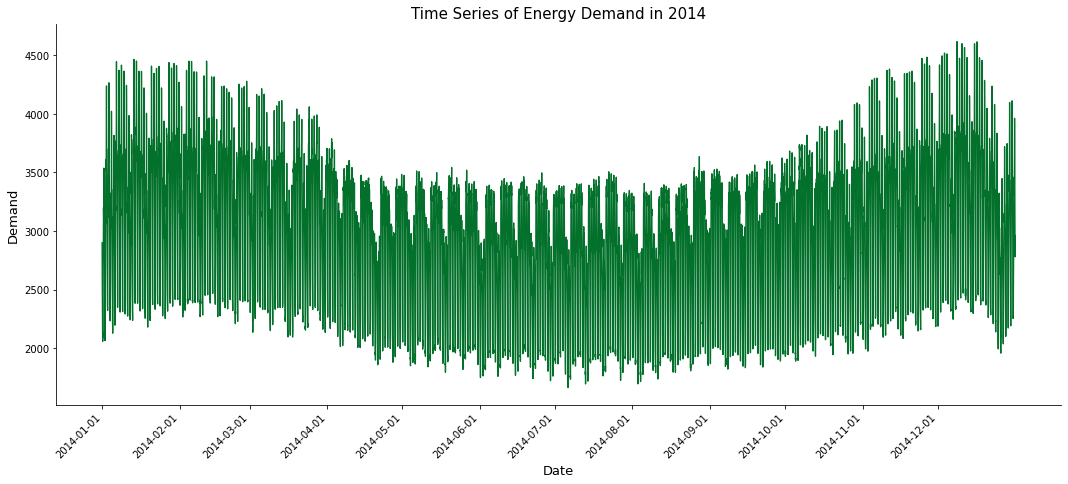

In [3]:
# Here we are converting the date and time columns to a datetime object
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Here we are setting the datetime column as the index so that we can work with the timeseries dataframe conveniently 
df.set_index('DateTime', inplace=True)

# Here we are checking the sum of the nan values in our demand column of the dataset, we have to get rid of these nan values using interpolation
print(df['Demand'].isnull().sum())

# Here we are using linear interpolation to fill the nan values and have used inplace = true so that the changes are made in our original dataframe
df.interpolate(method='linear', inplace=True)

# Here we are printing the sum of nan values and we will hopefully find this sum to be 0
print(df['Demand'].isnull().sum())

# Here we are plotting the time series of energy demand during the year of 2014
# Here we have set the figure  size as per our need and have used the hex color values to plot the graph in green color
# Here we have set the title, x - axis and y - axis labels along with mentioning their fontsize
# Here  we have modified the x axis values using x ticks so that we can see each month of the year, also we have removed the top and right border lines of our plot
fig = plt.figure(figsize=(18, 7))
plt.plot(df.index, df['Demand'], linewidth=1.3, c = "#03712B")
plt.title('Time Series of Energy Demand in 2014', fontsize = 15)
plt.xlabel('Date',fontsize = 13)
plt.ylabel('Demand',fontsize = 13)
plt.xticks(pd.date_range(start='1/1/2014', end='12/31/2014', freq='MS'), rotation=45, ha='right')
# plt.style.use('ggplot')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

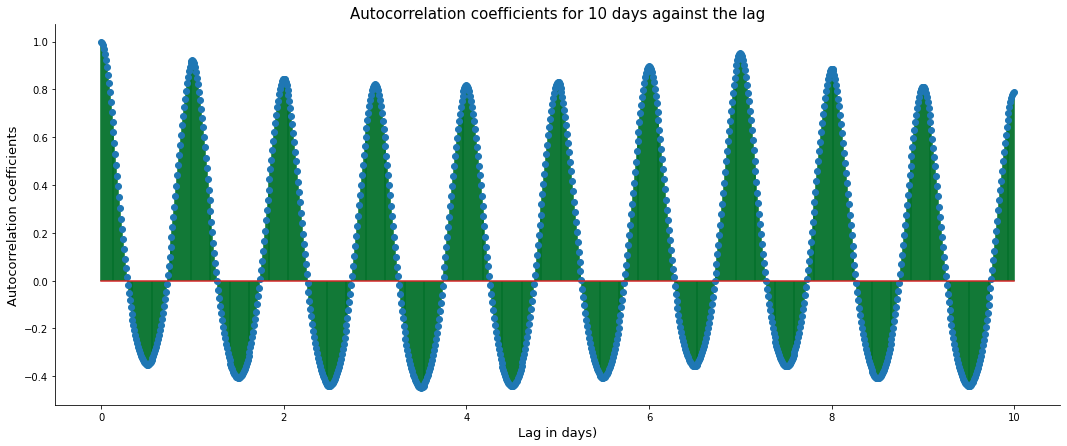

In [4]:
# Here we are computing the autocorrelation coefficients using the acf function
# We have 4 values for an hour, so 24x4 for a day and for 10 days its 960 values, and thus the lags is set as 960 

lags = 960

# Here we used the ACF and we know that it is a measure of the correlation between a time series and its own lagged values, up to a specified number of lags of 960 values
# We used the tsa.acf function as it returns the ACF values and the calculated ACF values are stored in the acf_vals variable
# We have set fft = False and by this the ACF is calculated directly without using the fast Fourier transform method
acf_vals = sm.tsa.acf(df['Demand'], nlags=lags, fft=False)

# Here we plot the autocorrelation coefficients against the lags in days
fig, ax = plt.subplots(figsize=(18, 7), linewidth=1)
# Here we generate a stem plot of the ACF values of a time series with lags on the x-axis converted to days
ax.stem(np.arange(lags+1)/96, acf_vals, use_line_collection=True, linefmt='#03712B')
# Here we have set the title, x - axis and y - axis labels along with mentioning their fontsize
ax.set_xlabel('Lag in days)', fontsize = 13)
ax.set_ylabel('Autocorrelation coefficients', fontsize = 13)
plt.title('Autocorrelation coefficients for 10 days against the lag', fontsize = 15)
# plt.style.use('ggplot')
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

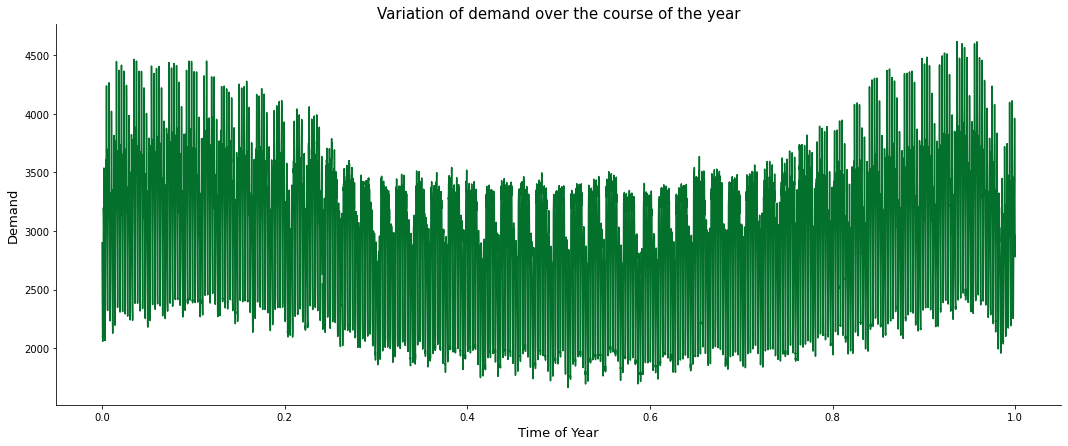

In [5]:
df_q3['datetime'] = pd.to_datetime(df_q3['Date'], format='%m/%d/%Y') + pd.to_timedelta(pd.to_datetime(df_q3['Time'], format='%H:%M').dt.time.astype(str))
df_q3['ToY'] = (df_q3['datetime'] - df_q3['datetime'].min()) / pd.Timedelta(days=365)

# Here we have plotted the demand over the course of the year
# plt.style.use('ggplot')
# Here we have set the figure size for the plot and the line widths to be used
fig, ax = plt.subplots(figsize=(18, 7), linewidth=1)
# Here we are plotting a line graph where the x-axis represents the "ToY" column from df_q3 dataframe and y-axis represents the "Demand" column
# from the dataframe. The color of the line is set to "#03712B"
ax.plot(df_q3['ToY'], df_q3['Demand'], c = "#03712B")
plt.title('Variation of demand over the course of the year', fontsize = 15)
# Here we have set the title, x - axis and y - axis labels along with mentioning their fontsize
ax.set_xlabel('Time of Year', fontsize = 13)
ax.set_ylabel('Demand', fontsize = 13)
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

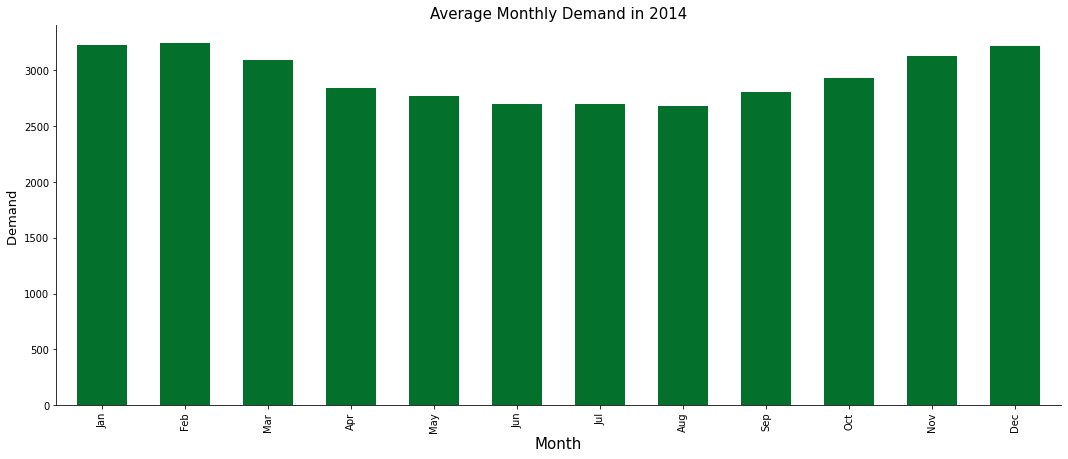

In [6]:
#Here we are converting the Date column to pandas datetime format, so that we can work with the timeseries data conveniently
df_q4['Date'] = pd.to_datetime(df_q4['Date'], format='%m/%d/%Y')
# print(df_q4['Date'])

# Here we are grouping the data by month and calculating the mean demand for each group which is created according to the groups
monthly_demand = df_q4.groupby(df_q4['Date'].dt.month)['Demand'].mean()
# print(monthly_demand)

# Here we are plotting the results as a bar chart using the monthly demand values we calculated in the previous step, we have set the figure size, the color and width according to ourself 
monthly_demand.plot(kind='bar', figsize=(18, 7), width=0.6, color='#03712B')

# Here we are adding title and labels to the plot and mentioning their fontsize 
# plt.style.use('ggplot')
plt.title('Average Monthly Demand in 2014', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Demand ', fontsize=13)
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Here we are using the x ticks to set the monthly values for the x axis 
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

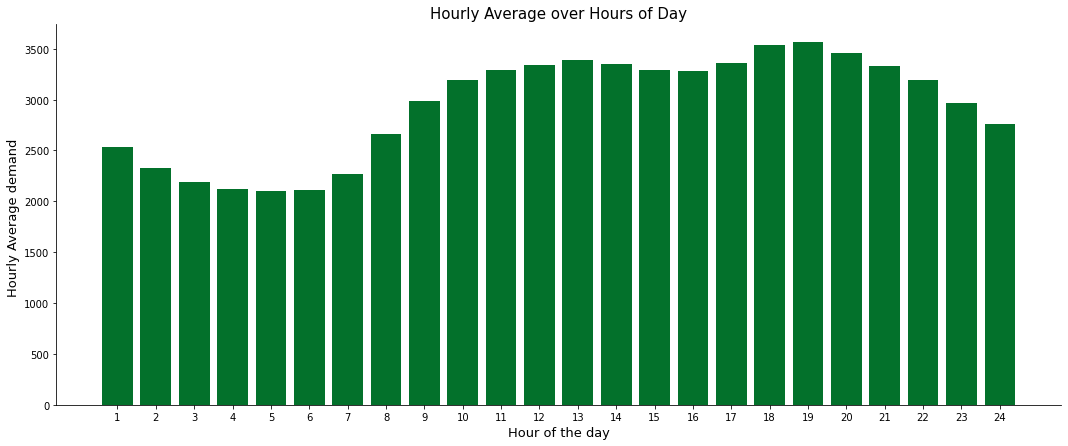

In [7]:
# Here we are converting the 'Time' column to a datetime object and we are extracting the hour of the day
df_q5['Hour'] = pd.to_datetime(df_q5['Time'], format='%H:%M').dt.hour + 1
# print(df_q5['Hour'])

# Here we are grouping the data by hour of the day and then we are calculating the mean demand for each group
hourly_demand = df_q5.groupby('Hour')['Demand'].mean()
# print(hourly_demand)

# Here we are creating a bar chart of the results, we have set the figure size as (18,7)
plt.figure(figsize=(18,7))
# Here the bar graph is made with the hourly demand values on the y axis
plt.bar(hourly_demand.index, hourly_demand.values, color = "#03712B")

plt.xlabel('Hour of the day', fontsize = 13)
plt.ylabel('Hourly Average demand ', fontsize = 13)
plt.title('Hourly Average over Hours of Day', fontsize = 15)
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# here we are using the x ticks for setting the values from 1 - 24 in a day
plt.xticks(range(1, 25))
plt.show()

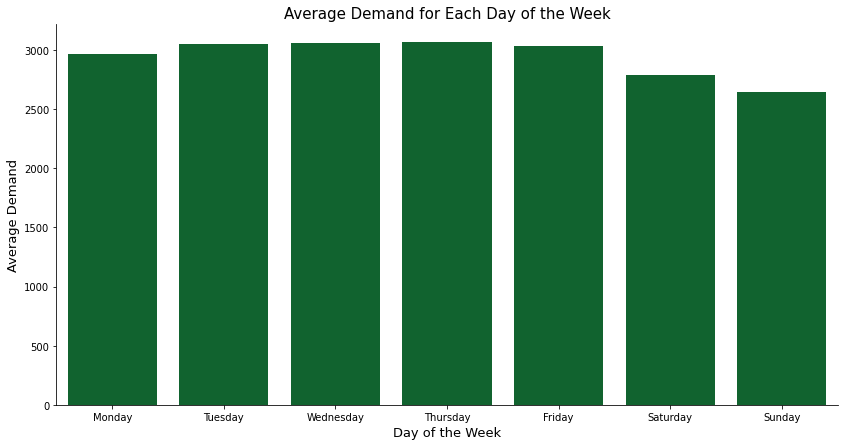

In [8]:
# Here we are converting the 'Date' column to datetime format so that we can conveniently work with the time series data
df_q6['Date'] = pd.to_datetime(df_q6['Date'], format='%m/%d/%Y')
# print(df_q6['Date'])

# Here we are grouping the data by day of the week and calculating the mean demand for each group
daily_demand = df_q6.groupby(df_q6['Date'].dt.day_name())['Demand'].mean()
# print(daily_demand)

# Here we have set the figure size and the title for the graph with the font size of 15
plt.figure(figsize=(14, 7))
plt.title('Average Demand for Each Day of the Week', fontsize=15)
# Here we have defined the order of the day of the week for plotting our values in that order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=daily_demand.index, y=daily_demand.values, order=day_order, color = "#03712B")
plt.xlabel('Day of the Week', fontsize=13)
plt.ylabel('Average Demand', fontsize=13)
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Show the plot
plt.show()

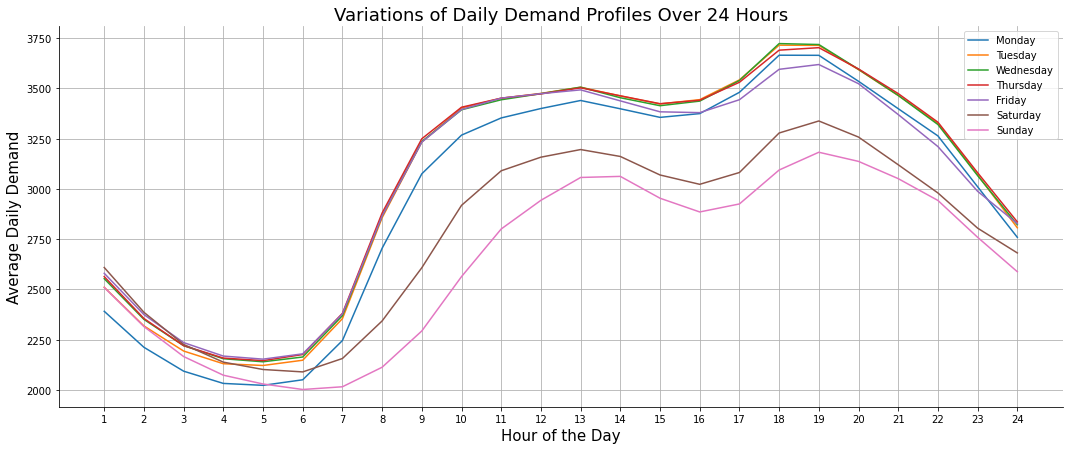

In [9]:
df_q7 = df.copy()
# Here we are converting the date and time column to a datetime data  series
df_q7['Datetime'] = pd.to_datetime(df_q7['Date'] + ' ' + df_q7['Time'], format='%m/%d/%Y %H:%M')
# print(df_q7)

# Here we are dropping the "Date" and "Time" columns
df_q7 = df_q7.drop(columns=['Date', 'Time'])
# print(df_q7)

# Here we are creating a pivot table with the demand values for each hour of each day of the week 
pivot_table = pd.pivot_table(df_q7, values='Demand', index=df_q7['Datetime'].dt.dayofweek+1, columns=df_q7['Datetime'].dt.hour+1)
# display(pivot_table)

# Here we have transposed the pivot table as we can easily form a line chart with the transposed table
transposed_table = pivot_table.transpose()
# Here we are setting the columns titles as the days of the week 
transposed_table.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# display(transposed_table)

# Here we are plotting the transposed pivot tables using a line chart
transposed_table.plot(kind='line', figsize=(18, 7))
plt.title('Variations of Daily Demand Profiles Over 24 Hours', fontsize = 18)
plt.xlabel('Hour of the Day', fontsize = 15)
plt.ylabel('Average Daily Demand', fontsize = 15)
# Here we have removed the top and right border lines of our plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(range(1, 25))
# Here we are using the grid method to show the grids in our plot which makes it easy to read the plot
plt.grid()
plt.show()

In [10]:
df_q8 = df.copy()
# Here we are converting the date and time column to a datetime data  series
df_q8['Datetime'] = pd.to_datetime(df_q8['Date'] + ' ' + df_q8['Time'], format='%m/%d/%Y %H:%M')

# Here we are splitting our data into the weekdays and weekends for the sake of our analysis
weekend_df = df_q8[(df_q8['Datetime'].dt.dayofweek == 5) | (df_q8['Datetime'].dt.dayofweek == 6)]
weekday_df = df_q8[(df_q8['Datetime'].dt.dayofweek >= 0) & (df_q8['Datetime'].dt.dayofweek <= 4)]

# Here we are dropping the nan vaues from the columns of demand from both of our datas
weekend_df = weekend_df.dropna(subset=['Demand'])
weekday_df = weekday_df.dropna(subset=['Demand'])

# Here we are taking the mean values of the demand columns from our dataframes of weekdays and weekends
weekend_mean = weekend_df['Demand'].mean()
weekday_mean = weekday_df['Demand'].mean()

# Here we are taking the standard deviations of the demand columns from our dataframes of weekdays and weekends
weekend_std = weekend_df['Demand'].std()
weekday_std = weekday_df['Demand'].std()

# Here we are calculating the t-score for a two-sample independent t-test, which is used to determine whether the means
# of two groups are significantly different from each other
t = (weekend_mean - weekday_mean) / np.sqrt((weekend_std ** 2 / len(weekend_df)) + (weekday_std ** 2 / len(weekday_df)))

# Here we are performing a two-sample independent t-test between two groups ('weekend_df' and 'weekday_df') based on their demand values
p_value = ttest_ind(weekend_df['Demand'], weekday_df['Demand'], equal_var=True).pvalue
print(t, p_value)

if p_value < 0.05:
    print("There is a statistically significant difference between demand during the weekend and during the working week.")
else:
    print("There is no statistically significant difference between demand during the weekend and during the working week.")

-51.363399969318884 0.0
There is a statistically significant difference between demand during the weekend and during the working week.


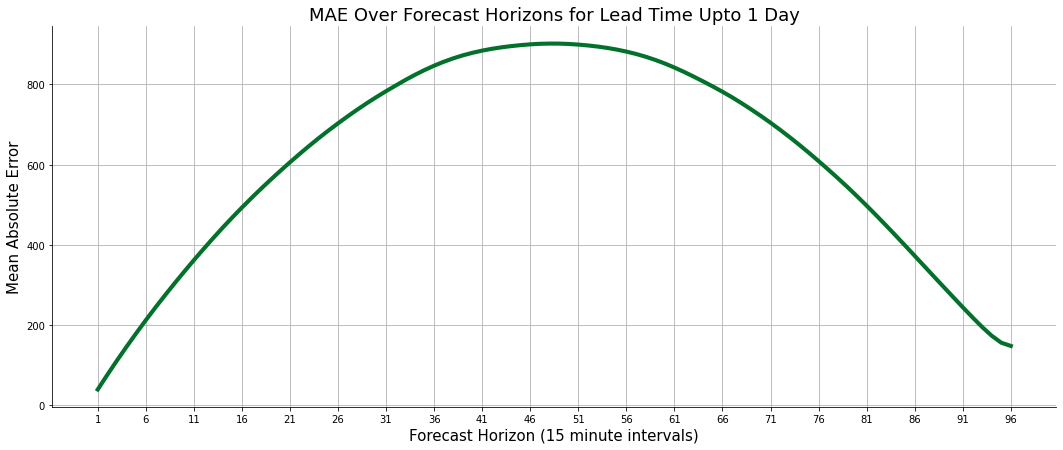

In [38]:
# Load the data into a dataframe
df_q9 = df.copy()
# Here we are converting the date and time column to a datetime data series
df_q9['Datetime'] = pd.to_datetime(df_q9['Date'] + ' ' + df_q9['Time'], format='%m/%d/%Y %H:%M')

# Here we have set the datetime column as our index and dropped the date and time columns from our dataset and after that we have resampled the data points on the bases of the values that are after every 15 minutes 
df_q9 = df_q9.set_index('Datetime')
df_q9 = df_q9.drop(columns=['Date', 'Time'])
df_q9 = df_q9.resample('15T').mean().interpolate()
# print(df_q9)

# Here we have divided the data into two halves, first half is called training df and second half is test df
df_train = df_q9.iloc[:len(df)//2]
# print(df_train)
df_test = df_q9.iloc[len(df)//2:]
# print(df_test)
# mae_list = []

# Here we are looping over the 96 forecast horizons and calculating the mae from the forecast and the true values
for i in range(1, 97):
    y_pred = df_q9['Demand'].shift(i).fillna(df_q9['Demand'].iloc[-1])
    df_q9['Persistence_' +str(i)] = df_q9.Demand.shift(i)
    mae = [mean_absolute_error(df_test, df_q9[i].iloc[17520:]) for i in df_q9]
    
# print(mae)
mae = mae[1::] 
# Here we have sliced the mae list to match the shape with the x axis values
# print(len(mae))

# Here we are plotting the mae plot against 96 forecasst horizons
# Here we have also used the method of x ticks to display the x axis values from 1 to 96 on the interval of 5 
# Here we are using the grid method to show the grids in our plot which makes it easy to read the plot
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(range(1, 97), mae, color="#03712B",  linewidth = 4.1)
plt.title('MAE Over Forecast Horizons for Lead Time Upto 1 Day', fontsize = 18)
ax.set_xlabel('Forecast Horizon (15 minute intervals)', fontsize = 15)
ax.set_ylabel('Mean Absolute Error', fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(1, 97, 5))
ax.grid()
plt.show()

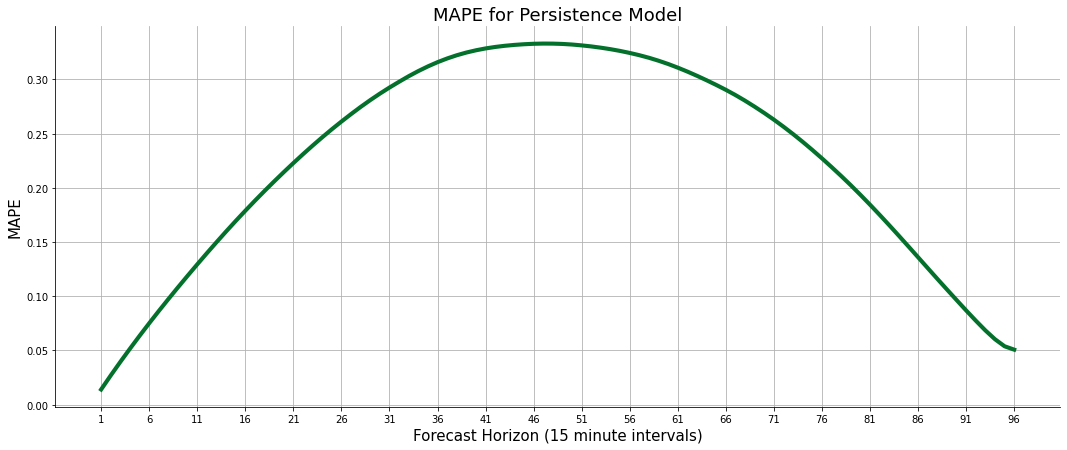

In [35]:
# Here we are creatin gan empty list for storing the mape, then we are iterating over the 96 horizons and 
# storing the values from the demand column of test dataframe as y_true. After that we are calling the persistence forecast function on the demand values of train dataframe
# Then we are calculating the mape from y_true and y_pred values and storing in ou list
# mape_list = []

for i in range(1, 97):
    y_pred = df_q9['Demand'].shift(i).fillna(df_q9['Demand'].iloc[-1])
    df_q9['Persistence_' +str(i)] = df_q9.Demand.shift(i)
    mape = [mean_absolute_percentage_error(df_test, df_q9[i].iloc[17520:]) for i in df_q9]

mape = mape[1::] 
# Here we have sliced the mape list to match the shape with the x axis values
# print(len(mape))

# Here we are ploting the MAPE for persistence model over the forecast horizons in the intervel of 15 minutes
# Here we have also used the method of x ticks to display the x axis values from 1 to 96 on the interval of 5 
# Here we are using the grid method to show the grids in our plot which makes it easy to read the plot
fig, ax = plt.subplots(figsize=(18, 7))
ax.plot(range(1, 97), mape, color="#03712B", linewidth = 4.1)
plt.title('MAPE for Persistence Model', fontsize = 18)
ax.set_xlabel('Forecast Horizon (15 minute intervals)', fontsize = 15)
ax.set_ylabel('MAPE', fontsize = 15)
# Here we have removed the top and right border lines of our plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(1, 97, 5))
ax.grid()
plt.show()